In [1]:
!python --version

!pip3 install -q keras tensorflow matplotlib numpy

Python 3.10.12


In [2]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Pré-processamento dos dados
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Convertendo rótulos para categorias one-hot
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes para os dígitos de 0 a 9
])



In [5]:
# Compilar o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Avaliar a precisão do modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
938/938 [==============================] - 53s 55ms/step - loss: 0.1809 - accuracy: 0.9448 - val_loss: 0.0495 - val_accuracy: 0.9851
Epoch 2/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0517 - accuracy: 0.9845 - val_loss: 0.0391 - val_accuracy: 0.9866
Epoch 3/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0320 - val_accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0325 - val_accuracy: 0.9894
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0278 - accuracy: 0.9899
Test accuracy: 0.9898999929428101


perda do set teste:  0.027827013283967972
acurácia:  0.9898999929428101
313/313 [==============================] - 3s 8ms/step


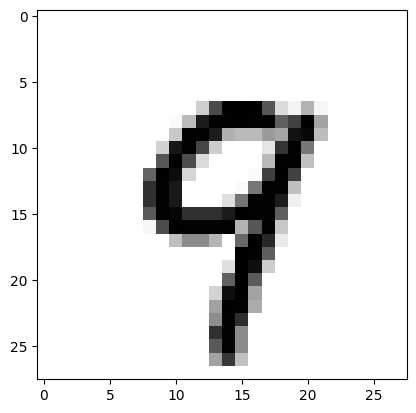

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("perda do set teste: ", score[0])
print("acurácia: ", score[1])

prediction = model.predict(test_images)
plt.imshow(test_images[12], cmap=plt.cm.binary)
plt.show()